In [9]:
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import timedelta

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,592.0,7.500000e+00,4.613671e+00,0.0,3.750000e+00,7.500000e+00,1.125000e+01,1.500000e+01
ID_0,592.0,1.606250e+02,6.736765e+01,38.0,1.307500e+02,1.575000e+02,2.190000e+02,2.560000e+02
OBJECTID_1,555.0,1.681333e+02,6.161078e+01,22.0,1.480000e+02,1.640000e+02,2.200000e+02,2.530000e+02
POP2000,555.0,2.242886e+07,2.844587e+07,0.0,8.777879e+06,1.135080e+07,2.330016e+07,1.138618e+08
SQKM,555.0,8.290951e+05,5.655817e+05,0.0,2.737192e+05,7.886289e+05,1.168002e+06,2.337027e+06
POPSQKM,555.0,3.676553e+01,3.866676e+01,0.0,6.751101e+00,1.672991e+01,5.555615e+01,1.248431e+02
Year,592.0,2.013730e+03,2.846542e+00,2009.0,2.011000e+03,2.014000e+03,2.016000e+03,2.019000e+03
Month,592.0,5.864865e+00,3.452650e+00,1.0,2.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
no_flood_events,592.0,1.993243e-01,5.243314e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
max_flood_sev,592.0,2.027027e-01,4.913390e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [131]:
sns.set_style('darkgrid')

In [2]:
data_dir = '../../Data'
data = gpd.read_file(os.path.join(data_dir, 'flood_polys_ipc.gpkg'))

In [3]:
# Optional to include data where floods did not occur in analyses
data = data.fillna({'max_flood_sev' : 0, 'mean_flood_sev' : 0, 'mean_flood_area_km2' : 0,
       'total_flood_area_km2' : 0, 'mean_flood_dur_days' : 0, 'total_flood_dur_days' : 0,
       'total_displaced_dfo' : 0})


In [4]:
data.datetime = pd.to_datetime(data.datetime)

In [5]:
covariates = ['no_flood_events', 'total_displaced_dfo',
       'max_flood_sev', 'mean_flood_sev', 'mean_flood_area_km2',
       'total_flood_area_km2', 'mean_flood_dur_days', 'total_flood_dur_days']

covariate_names = ['No. flood events in season', 'Total displaced (DFO)',
                  'Max flood severity in season', 'Mean flood severity in season',
                  'Mean flood extent (km2)', 'Total flood extent (km2)',
                  'Mean flood duration in season (days)', 'Total flood duration in season (days)']

# Flood effects on Food Insecurity

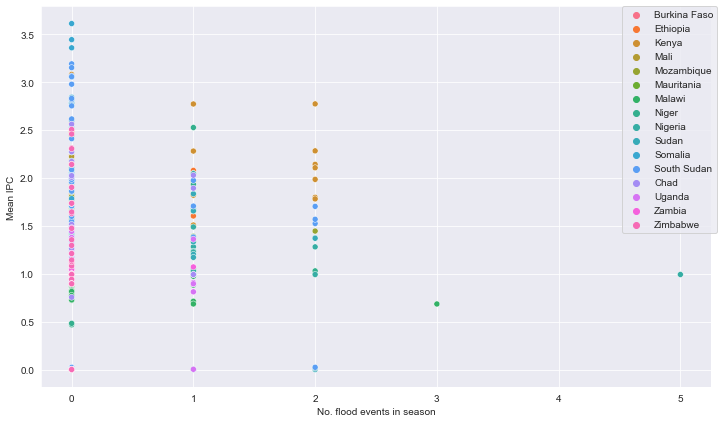

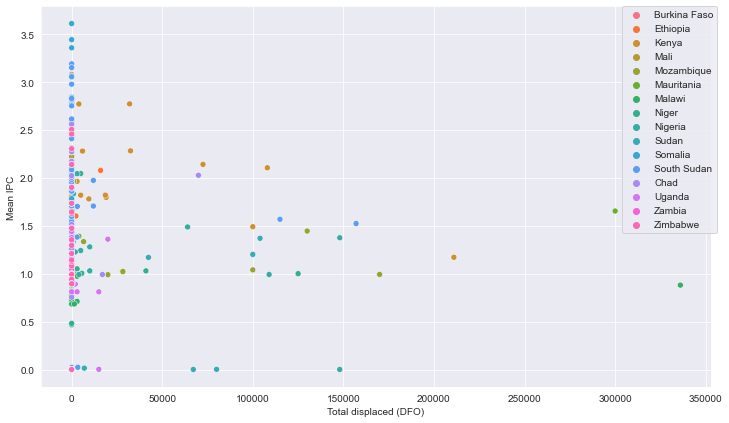

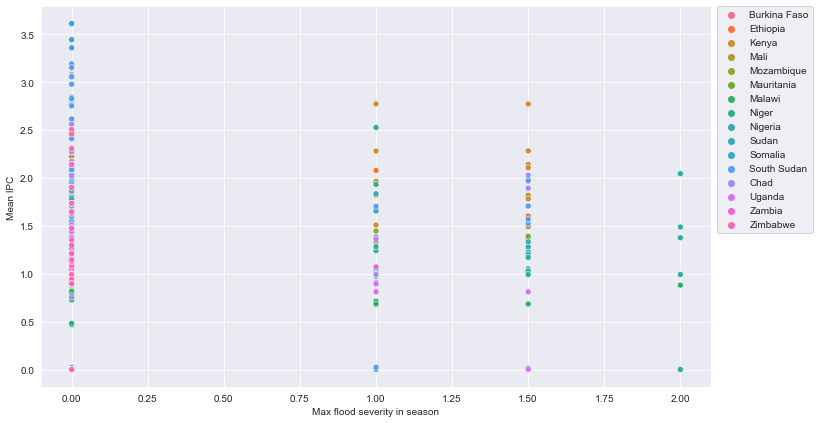

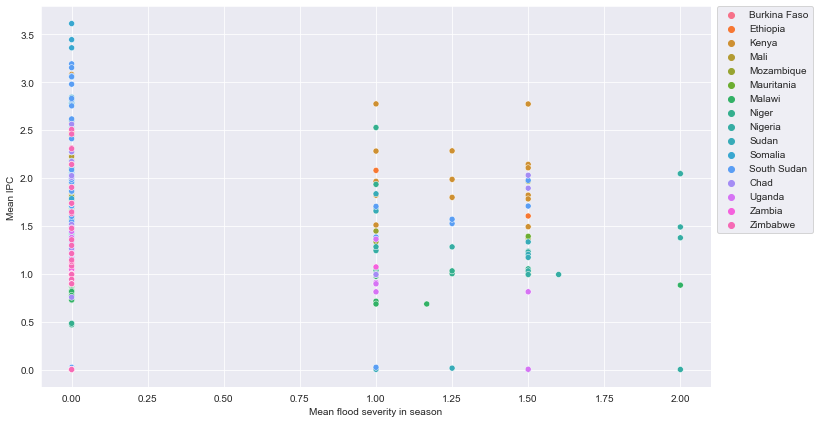

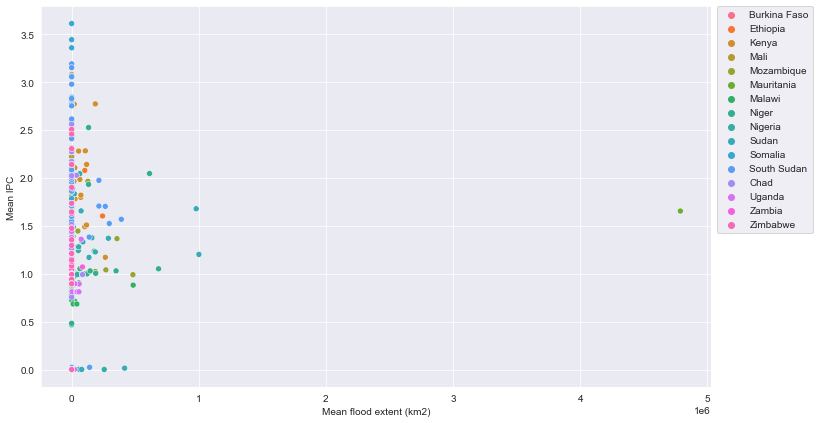

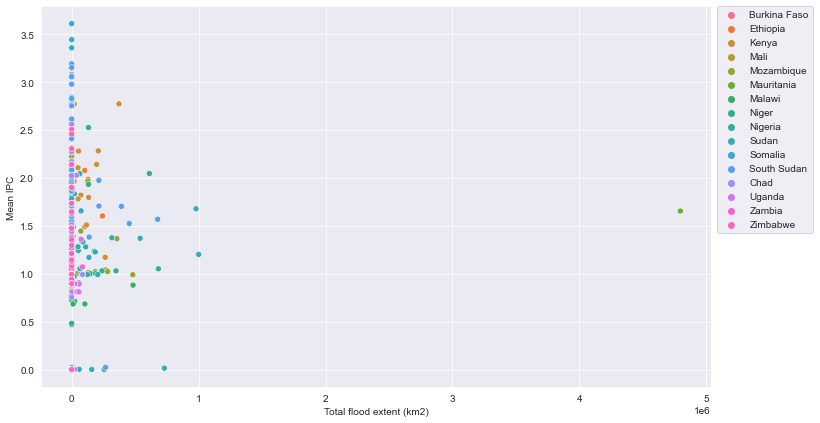

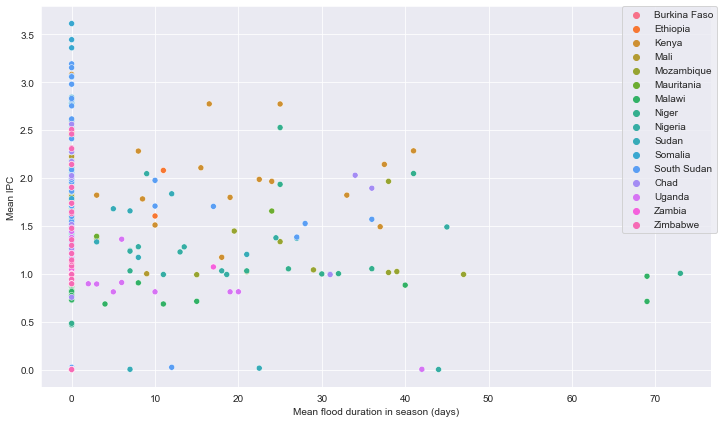

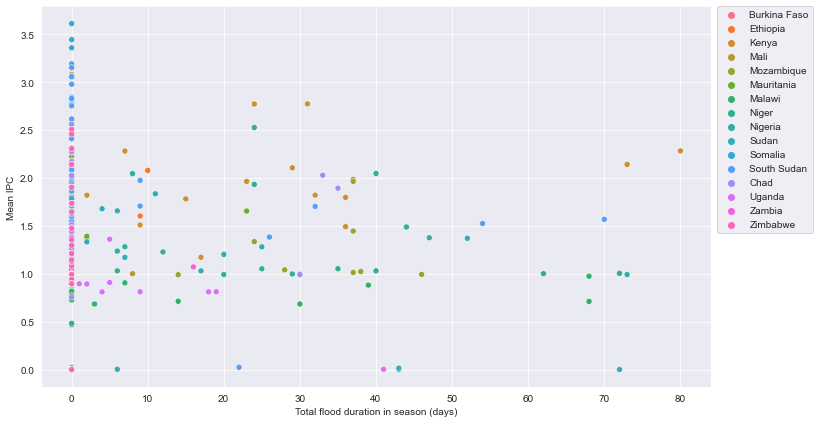

In [160]:
for i, cov in enumerate(covariate_names):

    fig, ax = plt.subplots(figsize = (12, 7))

    sns.scatterplot(x = covariates[i], y = "mean_ipc", hue = 'Name', 
                    data = data).set(xlabel = cov, ylabel = 'Mean IPC')
    plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)


    plt.show()
    

## Mixed effects models

In [17]:
model1 = smf.mixedlm('mean_ipc ~ no_flood_events', data = data, groups = "Name", missing = 'drop').fit()
model1.bse

Intercept          0.104502
no_flood_events    0.042380
Name Var           0.250781
dtype: float64

In [87]:
model2 = smf.mixedlm('mean_ipc ~ max_flood_sev', data = data, groups = "Name", missing = "drop").fit()
model2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:              MixedLM Dependent Variable: mean_ipc
No. Observations:   91      Method:             REML    
No. Groups:         13      Scale:              0.2365  
Min. group size:    1       Log-Likelihood:     -72.8236
Max. group size:    15      Converged:          Yes     
Mean group size:    7.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.346    0.256  5.248 0.000  0.843  1.849
max_flood_sev -0.049    0.179 -0.274 0.784 -0.399  0.301
Name Var       0.104    0.124                           
========================================================

"""

In [88]:
model3 = smf.mixedlm('mean_ipc ~ mean_flood_sev', data= data, groups = 'Name', missing = 'drop').fit()
model3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:             MixedLM Dependent Variable: mean_ipc
No. Observations:  91      Method:             REML    
No. Groups:        13      Scale:              0.2369  
Min. group size:   1       Log-Likelihood:     -72.8161
Max. group size:   15      Converged:          Yes     
Mean group size:   7.0                                 
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept      1.271    0.261 4.874 0.000  0.760  1.782
mean_flood_sev 0.009    0.186 0.050 0.960 -0.356  0.375
Name Var       0.103    0.123                          
=======================================================

"""

In [89]:
model4 = smf.mixedlm('mean_ipc ~ mean_flood_area_km2', data= data, groups = 'Name', missing = 'drop').fit()
model4.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:               MixedLM   Dependent Variable:   mean_ipc
No. Observations:    91        Method:               REML    
No. Groups:          13        Scale:                0.2353  
Min. group size:     1         Log-Likelihood:       -86.8711
Max. group size:     15        Converged:            Yes     
Mean group size:     7.0                                     
-------------------------------------------------------------
                    Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           1.261    0.113 11.137 0.000  1.039  1.482
mean_flood_area_km2 0.000    0.000  0.741 0.459 -0.000  0.000
Name Var            0.103    0.123                           
=============================================================

"""

In [90]:
model5 = smf.mixedlm('mean_ipc ~ total_flood_area_km2', data= data, groups = 'Name', missing = 'drop').fit()
model5.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:               MixedLM   Dependent Variable:   mean_ipc 
No. Observations:    592       Method:               REML     
No. Groups:          16        Scale:                0.2579   
Min. group size:     37        Log-Likelihood:       -480.0561
Max. group size:     37        Converged:            Yes      
Mean group size:     37.0                                     
--------------------------------------------------------------
                     Coef. Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            1.353    0.104 13.060 0.000  1.150  1.557
total_flood_area_km2 0.000    0.000  0.058 0.954 -0.000  0.000
Name Var             0.165    0.125                           
==============================================================

"""

In [91]:
model6 = smf.mixedlm('mean_ipc ~ mean_flood_dur_days', data= data, groups = 'Name', missing = 'drop').fit()
model6.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:                MixedLM   Dependent Variable:   mean_ipc
No. Observations:     91        Method:               REML    
No. Groups:           13        Scale:                0.2315  
Min. group size:      1         Log-Likelihood:       -75.9220
Max. group size:      15        Converged:            Yes     
Mean group size:      7.0                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            1.382    0.134 10.311 0.000  1.119  1.644
mean_flood_dur_days -0.005    0.004 -1.295 0.195 -0.012  0.002
Name Var             0.106    0.126                           
==============================================================

"""

In [92]:
model7 = smf.mixedlm('mean_ipc ~ total_flood_dur_days', data = data, groups = 'Name', missing = 'drop').fit()
model7.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:               MixedLM    Dependent Variable:    mean_ipc
No. Observations:    91         Method:                REML    
No. Groups:          13         Scale:                 0.2303  
Min. group size:     1          Log-Likelihood:        -76.1415
Max. group size:     15         Converged:             Yes     
Mean group size:     7.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             1.373    0.129 10.625 0.000  1.120  1.626
total_flood_dur_days -0.004    0.003 -1.364 0.173 -0.009  0.002
Name Var              0.109    0.129                           
===============================================================

"""

In [167]:
model17 = smf.mixedlm('mean_ipc ~ no_flood_events + total_flood_area_km2 + total_flood_dur_days', data = data, groups = 'Name', missing = 'drop').fit()
model17.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM   Dependent Variable:   mean_ipc 
No. Observations:     592       Method:               REML     
No. Groups:           16        Scale:                0.2566   
Min. group size:      37        Log-Likelihood:       -484.7470
Max. group size:      37        Converged:            Yes      
Mean group size:      37.0                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             1.370    0.105 13.102 0.000  1.165  1.575
no_flood_events      -0.067    0.075 -0.892 0.372 -0.214  0.080
total_flood_area_km2  0.000    0.000  0.807 0.419 -0.000  0.000
total_flood_dur_days -0.001    0.003 -0.480 0.631 -0.008  0.005
Name Var              0.167    0.127                           
===============================================================

"""

In [9]:
data['mean_ipc_next'] = data.groupby(data['Name'])['mean_ipc'].shift(-1)
data['mean_ipc_nextnext'] = data.groupby(data['Name'])['mean_ipc'].shift(-2)
data['mean_ipc_nextnextnext'] = data.groupby(data['Name'])['mean_ipc'].shift(-3)

In [180]:
model18 = smf.mixedlm('mean_ipc_next ~ no_flood_events + total_flood_area_km2 + total_flood_dur_days + mean_ipc', data = data, groups = 'Name', missing = 'drop').fit()
model18.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:              MixedLM  Dependent Variable:  mean_ipc_next
No. Observations:   576      Method:              REML         
No. Groups:         16       Scale:               0.1934       
Min. group size:    36       Log-Likelihood:      -387.1220    
Max. group size:    36       Converged:           Yes          
Mean group size:    36.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.722    0.079  9.151 0.000  0.568  0.877
no_flood_events      -0.137    0.066 -2.089 0.037 -0.265 -0.008
total_flood_area_km2  0.000    0.000  0.724 0.469 -0.000  0.000
total_flood_dur_days  0.003    0.003  1.164 0.245 -0.002  0.008
mean_ipc              0.472    0.038 12.282 0.000  0.397  0.547
Name Var              0.049    0.049                           
===============================================================

"""

In [181]:
model19 = smf.mixedlm('mean_ipc_nextnext ~ no_flood_events + total_flood_area_km2 + total_flood_dur_days + mean_ipc_next', data = data, groups = 'Name', missing = 'drop').fit()
model19.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:            MixedLM Dependent Variable: mean_ipc_nextnext
No. Observations: 560     Method:             REML             
No. Groups:       16      Scale:              0.1845           
Min. group size:  35      Log-Likelihood:     -362.6924        
Max. group size:  35      Converged:          No               
Mean group size:  35.0                                         
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             0.634    0.076  8.390 0.000  0.486  0.782
no_flood_events       0.131    0.065  1.997 0.046  0.002  0.259
total_flood_area_km2  0.000    0.000  0.738 0.461 -0.000  0.000
total_flood_dur_days -0.001    0.003 -0.440 0.660 -0.006  0.004
mean_ipc_next         0.504    0.040 12.629 0.000  0.425  0.582
Name Var              0.037    0.040                           
===============================================================

"""

In [183]:
model20 = smf.mixedlm('mean_ipc_nextnextnext ~ no_flood_events + total_flood_area_km2 + total_flood_dur_days + mean_ipc_nextnext', data = data, groups = 'Name', missing = 'drop').fit()
model20.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:            MixedLM Dependent Variable: mean_ipc_nextnextnext
No. Observations: 544     Method:             REML                 
No. Groups:       16      Scale:              0.1896               
Min. group size:  34      Log-Likelihood:     -361.6278            
Max. group size:  34      Converged:          Yes                  
Mean group size:  34.0                                             
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.703    0.079  8.913 0.000  0.549  0.858
no_flood_events          -0.099    0.066 -1.494 0.135 -0.229  0.031
total_flood_area_km2      0.000    0.000  0.599 0.549 -0.000  0.000
total_flood_dur_days      0.004    0.003  1.367 0.172 -0.002  0.009
mean_ipc_nextnext         0.472    0.042 11.363 0.000  0.391  0.553
Name Var                  0.044    0.046                           
===================================================================

"""

In [7]:
model21 = smf.ols('mean_ipc ~ no_flood_events + total_flood_area_km2 + total_flood_dur_days + Name + no_flood_events*Name', data = data,
                 missing = 'drop').fit()
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mean_ipc   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     13.08
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.28e-47
Time:                        11:45:56   Log-Likelihood:                -420.10
No. Observations:                 592   AIC:                             902.2
Df Residuals:                     561   BIC:                             1038.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.9567      0.083     11.515      0.000       0.794       1.120
Name[T.Chad]                            0.3980      0.121      3.289      0.001       0.160       0.636
Name[T.Ethiopia]                        0.9199      0.119      7.719      0.000       0.686       1.154
Name[T.Kenya]                           1.0024      0.133      7.524      0.000       0.741       1.264
Name[T.Malawi]                         -0.0716      0.123     -0.584      0.559      -0.312       0.169
Name[T.Mali]                            0.2781      0.118      2.350      0.019       0.046       0.510
Name[T.Mauritania]                      0.2501      0.119      2.099      0.036       0.016       0.484
Name[T.Mozambique]                      0.1532      0.127      1.210      0.227      -0.095       0.402
Name[T.Niger]                           0.3141      0.128      2.457      0.014       0.063       0.565
Name[T.Nigeria]                         0.3568      0.125      2.845      0.005       0.110       0.603
Name[T.Somalia]                         1.2696      0.118     10.805      0.000       1.039       1.500
Name[T.South Sudan]                     0.9799      0.123      7.937      0.000       0.737       1.222
Name[T.Sudan]                           0.4829      0.127      3.815      0.000       0.234       0.731
Name[T.Uganda]                         -0.0130      0.127     -0.102      0.919      -0.262       0.236
Name[T.Zambia]                         -0.0847      0.118     -0.716      0.474      -0.317       0.148
Name[T.Zimbabwe]                        0.3504      0.118      2.982      0.003       0.120       0.581
no_flood_events                        -0.0258      0.096     -0.268      0.788      -0.215       0.163
no_flood_events:Name[T.Chad]            0.2123      0.265      0.801      0.423      -0.308       0.733
no_flood_events:Name[T.Ethiopia]       -0.0070      0.349     -0.020      0.984      -0.692       0.678
no_flood_events:Name[T.Kenya]           0.1040      0.125      0.831      0.406      -0.142       0.350
no_flood_events:Name[T.Malawi]         -0.0079      0.152     -0.052      0.959      -0.307       0.291
no_flood_events:Name[T.Mali]           -0.1959      0.482     -0.407      0.684      -1.142       0.750
no_flood_events:Name[T.Mauritania]      0.1198      0.453      0.265      0.791      -0.769       1.009
no_flood_events:Name[T.Mozambique]      0.1459      0.155      0.941      0.347      -0.159       0.450
no_flood_events:Name[T.Niger]           0.0807      0.157      0.515      0.606      -0.227       0.388
no_flood_events:Name[T.Nigeria]        -0.0170      0.111     -0.154      0.878      -0.234       0.200
no_flood_events:Name[T.Somalia]     -2.342e-16   1.43e-16     -1.63

In [10]:
model22 = smf.ols('mean_ipc_next ~ mean_ipc + no_flood_events + total_flood_area_km2 + total_flood_dur_days + Name + no_flood_events*Name', data = data,
                 missing = 'drop').fit()
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_ipc_next   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     21.21
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.66e-74
Time:                        11:47:11   Log-Likelihood:                -327.93
No. Observations:                 576   AIC:                             719.9
Df Residuals:                     544   BIC:                             859.2
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.5154      0.082      6.276      0.000       0.354       0.677
Name[T.Chad]                            0.2064      0.108      1.915      0.056      -0.005       0.418
Name[T.Ethiopia]                        0.5237      0.110      4.739      0.000       0.307       0.741
Name[T.Kenya]                           0.6364      0.124      5.139      0.000       0.393       0.880
Name[T.Malawi]                          0.0068      0.108      0.063      0.950      -0.206       0.220
Name[T.Mali]                            0.1607      0.105      1.532      0.126      -0.045       0.367
Name[T.Mauritania]                      0.1325      0.106      1.254      0.210      -0.075       0.340
Name[T.Mozambique]                      0.1917      0.111      1.726      0.085      -0.026       0.410
Name[T.Niger]                           0.1558      0.114      1.370      0.171      -0.068       0.379
Name[T.Nigeria]                         0.2042      0.112      1.829      0.068      -0.015       0.423
Name[T.Somalia]                         0.7908      0.114      6.938      0.000       0.567       1.015
Name[T.South Sudan]                     0.5965      0.114      5.214      0.000       0.372       0.821
Name[T.Sudan]                           0.2153      0.113      1.901      0.058      -0.007       0.438
Name[T.Uganda]                          0.0595      0.112      0.531      0.596      -0.161       0.280
Name[T.Zambia]                         -0.0430      0.104     -0.412      0.681      -0.248       0.162
Name[T.Zimbabwe]                        0.2418      0.104      2.319      0.021       0.037       0.447
mean_ipc                                0.4383      0.038     11.650      0.000       0.364       0.512
no_flood_events                        -0.1115      0.084     -1.324      0.186      -0.277       0.054
no_flood_events:Name[T.Chad]            0.2628      0.231      1.136      0.256      -0.192       0.717
no_flood_events:Name[T.Ethiopia]       -0.0058      0.304     -0.019      0.985      -0.603       0.591
no_flood_events:Name[T.Kenya]          -0.0643      0.110     -0.586      0.558      -0.280       0.151
no_flood_events:Name[T.Malawi]         -0.0978      0.133     -0.737      0.462      -0.358       0.163
no_flood_events:Name[T.Mali]           -0.0272      0.419     -0.065      0.948      -0.851       0.797
no_flood_events:Name[T.Mauritania]     -0.0533      0.395     -0.135      0.893      -0.829       0.722
no_flood_events:Name[T.Mozambique]     -0.1880      0.138     -1.363      0.173      -0.459       0.083
no_flood_events:Name[T.Niger]           0.0398      0.137      0.290      0.772      -0.229       0.309
no_flood_events:Name[T.Nigeria]         0.0483      0.096      0.50

In [11]:
model23 = smf.ols('mean_ipc_nextnext ~ mean_ipc_next + no_flood_events + total_flood_area_km2 + total_flood_dur_days + Name + no_flood_events*Name', data = data,
                 missing = 'drop').fit()
model23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mean_ipc_nextnext   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     20.61
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.19e-71
Time:                        11:47:48   Log-Likelihood:                -309.48
No. Observations:                 560   AIC:                             683.0
Df Residuals:                     528   BIC:                             821.5
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.4901      0.082      5.951      0.000       0.328       0.652
Name[T.Chad]                            0.1898      0.108      1.763      0.078      -0.022       0.401
Name[T.Ethiopia]                        0.4883      0.111      4.414      0.000       0.271       0.706
Name[T.Kenya]                           0.5126      0.125      4.087      0.000       0.266       0.759
Name[T.Malawi]                         -0.0613      0.108     -0.566      0.572      -0.274       0.151
Name[T.Mali]                            0.1482      0.105      1.415      0.158      -0.058       0.354
Name[T.Mauritania]                      0.1220      0.106      1.156      0.248      -0.085       0.329
Name[T.Mozambique]                      0.1086      0.111      0.976      0.330      -0.110       0.327
Name[T.Niger]                           0.1070      0.114      0.940      0.348      -0.117       0.331
Name[T.Nigeria]                         0.1130      0.111      1.018      0.309      -0.105       0.331
Name[T.Somalia]                         0.7131      0.116      6.166      0.000       0.486       0.940
Name[T.South Sudan]                     0.4907      0.115      4.271      0.000       0.265       0.716
Name[T.Sudan]                           0.2240      0.112      2.000      0.046       0.004       0.444
Name[T.Uganda]                         -0.0315      0.111     -0.284      0.777      -0.249       0.186
Name[T.Zambia]                         -0.0377      0.104     -0.361      0.718      -0.243       0.167
Name[T.Zimbabwe]                        0.2448      0.104      2.349      0.019       0.040       0.450
mean_ipc_next                           0.4576      0.039     11.805      0.000       0.381       0.534
no_flood_events                         0.1071      0.084      1.271      0.204      -0.058       0.273
no_flood_events:Name[T.Chad]            0.1635      0.228      0.716      0.474      -0.285       0.612
no_flood_events:Name[T.Ethiopia]        0.0201      0.299      0.067      0.947      -0.568       0.608
no_flood_events:Name[T.Kenya]          -0.0550      0.108     -0.507      0.612      -0.268       0.158
no_flood_events:Name[T.Malawi]          0.0836      0.131      0.638      0.524      -0.174       0.341
no_flood_events:Name[T.Mali]            0.0111      0.413      0.027      0.979      -0.800       0.823
no_flood_events:Name[T.Mauritania]     -0.1276      0.389     -0.328      0.743      -0.892       0.637
no_flood_events:Name[T.Mozambique]     -0.0240      0.136     -0.176      0.860      -0.292       0.244
no_flood_events:Name[T.Niger]           0.0087      0.135      0.064      0.949      -0.257       0.275
no_flood_events:Name[T.Nigeria]         0.0301      0.095      0.31

In [10]:
data.loc[data.index[-1], 'datetime'] + timedelta(days = 120)

Timestamp('2019-06-01 00:00:00')

# Flood effects on displacement

In [161]:
covariates2 = ['no_flood_events', 'mean_ipc',
       'max_flood_sev', 'mean_flood_sev', 'mean_flood_area_km2',
       'total_flood_area_km2', 'mean_flood_dur_days', 'total_flood_dur_days']

covariate_names2 = ['No. flood events in season', 'Mean IPC rating',
                  'Max flood severity in season', 'Mean flood severity in season',
                  'Mean flood extent (km2)', 'Total flood extent (km2)',
                  'Mean flood duration in season (days)', 'Total flood duration in season (days)']

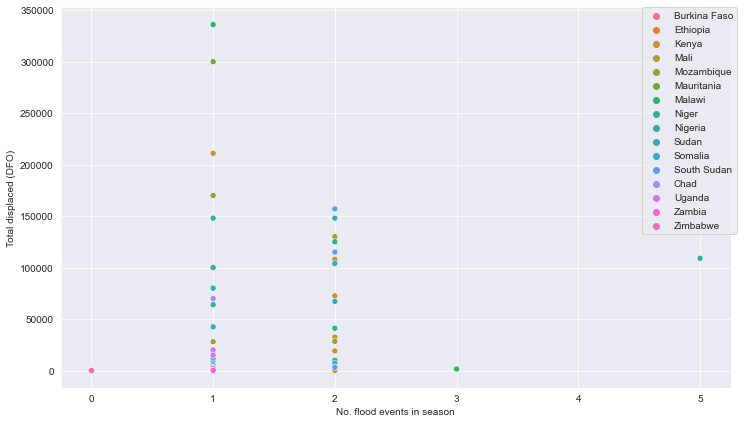

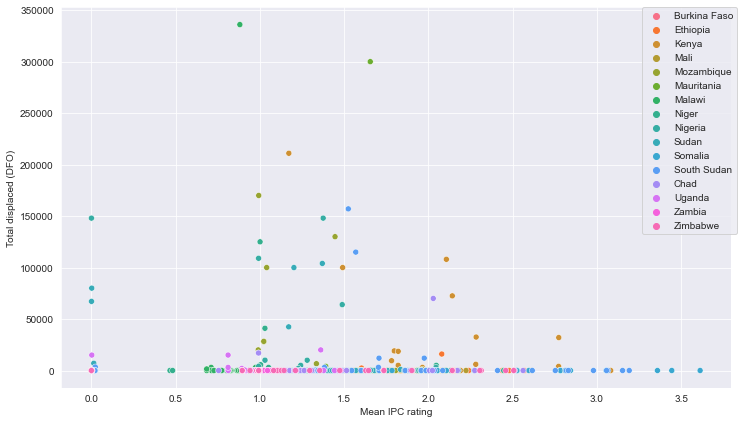

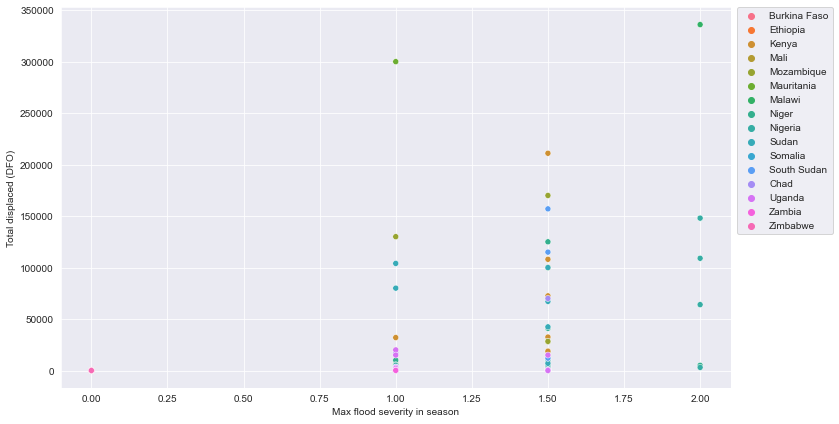

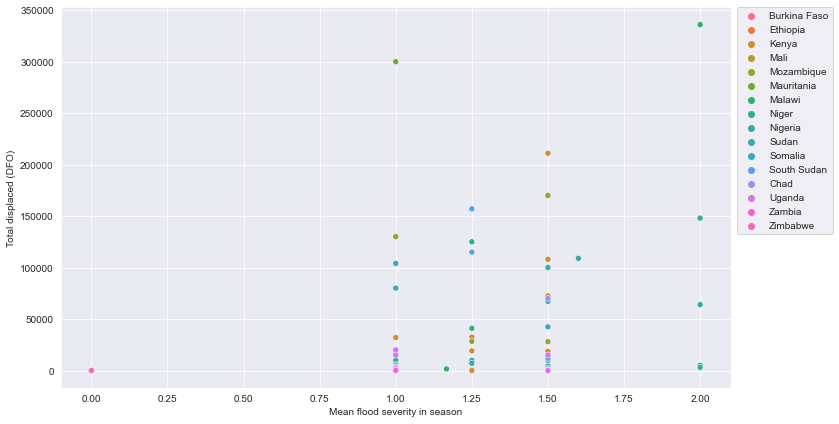

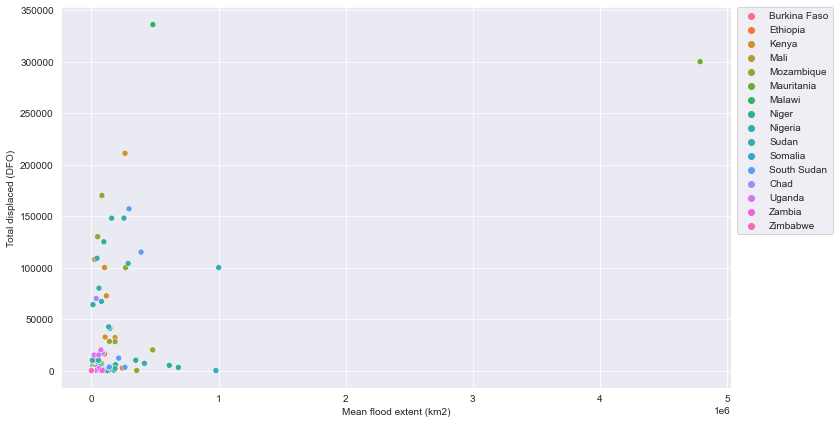

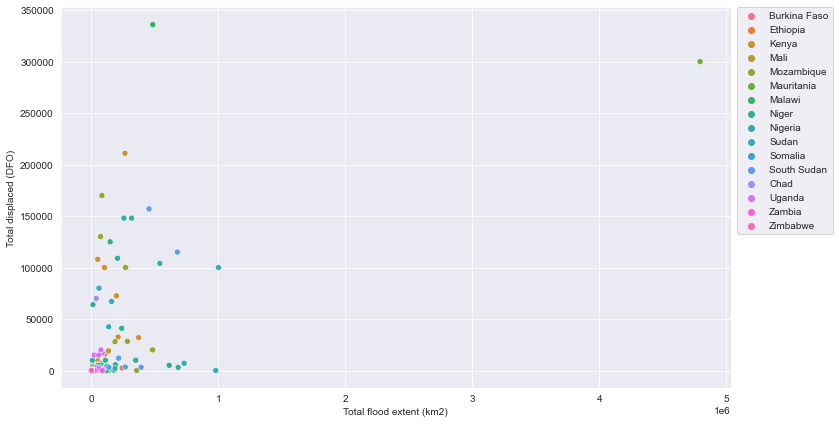

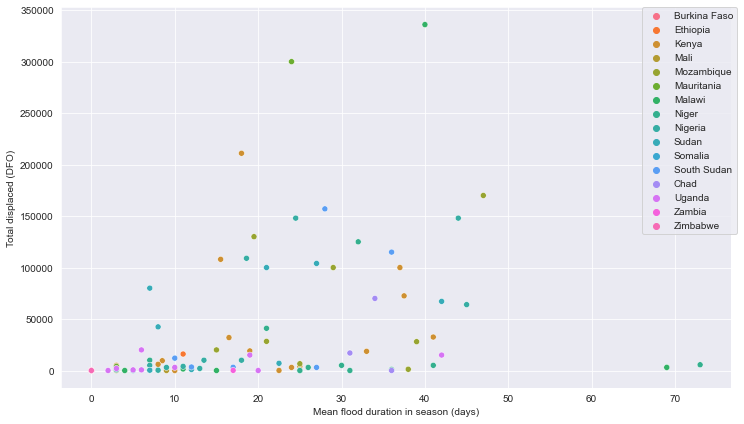

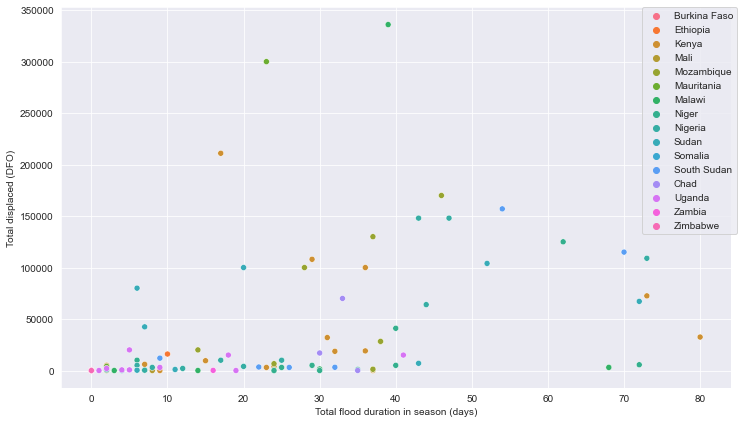

In [163]:
for i, cov in enumerate(covariate_names2):

    fig, ax = plt.subplots(figsize = (12, 7))

    sns.scatterplot(x = covariates2[i], y = "total_displaced_dfo", hue = 'Name', 
                    data = data).set(xlabel = cov, ylabel = 'Total displaced (DFO)')
    plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)


    plt.show()

## Mixed effects models

In [93]:
model8 = smf.mixedlm('total_displaced_dfo ~ no_flood_events', data= data, groups = 'Name', missing = 'drop').fit()
model8.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:              MixedLM Dependent Variable: total_displaced_dfo
No. Observations:   592     Method:             REML               
No. Groups:         16      Scale:              604786488.3292     
Min. group size:    37      Log-Likelihood:     -6807.9246         
Max. group size:    37      Converged:          Yes                
Mean group size:    37.0                                           
-------------------------------------------------------------------
                  Coef.   Std.Err.   z    P>|z|   [0.025    0.975] 
-------------------------------------------------------------------
Intercept         330.552 1081.325  0.306 0.760 -1788.805  2449.910
no_flood_events 26650.585 1927.871 13.824 0.000 22872.028 30429.142
Name Var            0.124                                          
===================================================================

"""

In [94]:
model9 = smf.mixedlm('total_displaced_dfo ~ max_flood_sev', data= data, groups = 'Name', missing = 'drop').fit()
model9.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:                MixedLM   Dependent Variable:   total_displaced_dfo
No. Observations:     91        Method:               REML               
No. Groups:           13        Scale:                3591728635.0609    
Min. group size:      1         Log-Likelihood:       -1110.2316         
Max. group size:      15        Converged:            No                 
Mean group size:      7.0                                                
-------------------------------------------------------------------------
                  Coef.      Std.Err.   z    P>|z|    [0.025     0.975]  
-------------------------------------------------------------------------
Intercept        -56127.504 27891.176 -2.012 0.044 -110793.206  -1461.803
max_flood_sev     70890.847 20047.621  3.536 0.000   31598.233 110183.462
Name Var      164774603.002                                              
=========================================================================

"""

In [95]:
model10 = smf.mixedlm('total_displaced_dfo ~ mean_flood_sev', data= data, groups = 'Name', missing = 'drop').fit()
model10.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
==========================================================================
Model:               MixedLM    Dependent Variable:    total_displaced_dfo
No. Observations:    91         Method:                REML               
No. Groups:          13         Scale:                 3635454819.6936    
Min. group size:     1          Log-Likelihood:        -1110.8217         
Max. group size:     15         Converged:             No                 
Mean group size:     7.0                                                  
--------------------------------------------------------------------------
                   Coef.      Std.Err.   z    P>|z|    [0.025     0.975]  
--------------------------------------------------------------------------
Intercept         -52999.227 28729.740 -1.845 0.065 -109308.482   3310.029
mean_flood_sev     70362.195 21361.301  3.294 0.001   28494.815 112229.576
Name Var       179526289.038                                              
==========================================================================

"""

In [96]:
model11 = smf.mixedlm('total_displaced_dfo ~ mean_flood_area_km2', data= data, groups = 'Name', missing = 'drop').fit()
model11.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:               MixedLM  Dependent Variable:  total_displaced_dfo
No. Observations:    91       Method:              REML               
No. Groups:          13       Scale:               3175922703.9134    
Min. group size:     1        Log-Likelihood:      -1117.5615         
Max. group size:     15       Converged:           Yes                
Mean group size:     7.0                                              
----------------------------------------------------------------------
                      Coef.   Std.Err.   z   P>|z|   [0.025    0.975] 
----------------------------------------------------------------------
Intercept           24838.097 6595.088 3.766 0.000 11911.961 37764.232
mean_flood_area_km2     0.059    0.012 5.141 0.000     0.037     0.082
Name Var                1.589 4192.851                                
======================================================================

"""

In [97]:
model12 = smf.mixedlm('total_displaced_dfo ~ total_flood_area_km2', data= data, groups = 'Name', missing = 'drop').fit()
model12.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:              MixedLM   Dependent Variable:   total_displaced_dfo
No. Observations:   592       Method:               REML               
No. Groups:         16        Scale:                518600245.5954     
Min. group size:    37        Log-Likelihood:       -6778.4381         
Max. group size:    37        Converged:            Yes                
Mean group size:    37.0                                               
-----------------------------------------------------------------------
                        Coef.    Std.Err.   z    P>|z|  [0.025  0.975] 
-----------------------------------------------------------------------
Intercept               3001.414 1147.052  2.617 0.009 753.234 5249.595
total_flood_area_km2       0.075    0.004 17.567 0.000   0.067    0.083
Name Var             6673724.005  336.195                              
=======================================================================

"""

In [98]:
model13 = smf.mixedlm('total_displaced_dfo ~ mean_flood_dur_days', data= data, groups = 'Name', missing = 'drop').fit()
model13.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:                 MixedLM    Dependent Variable:    total_displaced_dfo
No. Observations:      91         Method:                REML               
No. Groups:            13         Scale:                 3782379230.2189    
Min. group size:       1          Log-Likelihood:        -1116.2379         
Max. group size:       15         Converged:             No                 
Mean group size:       7.0                                                  
----------------------------------------------------------------------------
                        Coef.      Std.Err.   z   P>|z|   [0.025     0.975] 
----------------------------------------------------------------------------
Intercept               12390.857 13832.666 0.896 0.370 -14720.671 39502.385
mean_flood_dur_days      1123.980   619.517 1.814 0.070    -90.250  2338.211
Name Var            148571022.727 28627.942                                 
============================================================================

"""

In [198]:
model14 = smf.mixedlm('total_displaced_dfo ~ total_flood_dur_days + no_flood_events + total_flood_area_km2', data= data, groups = 'Name', missing = 'drop').fit()
model14.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:               MixedLM  Dependent Variable:  total_displaced_dfo
No. Observations:    592      Method:              REML               
No. Groups:          16       Scale:               404765921.7522     
Min. group size:     37       Log-Likelihood:      -6687.3570         
Max. group size:     37       Converged:           Yes                
Mean group size:     37.0                                             
----------------------------------------------------------------------
                      Coef.   Std.Err.   z    P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
Intercept            -202.301  885.692 -0.228 0.819 -1938.226 1533.623
total_flood_dur_days  958.190  122.296  7.835 0.000   718.494 1197.886
no_flood_events      -651.796 2943.196 -0.221 0.825 -6420.353 5116.762
total_flood_area_km2    0.058    0.004 14.550 0.000     0.050    0.066
Name Var                0.077  327.361                                
======================================================================

"""

In [44]:
model15 = smf.mixedlm('total_displaced_dfo ~ mean_ipc', data= data, groups = 'Name', missing = 'drop').fit()
model15.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:            MixedLM Dependent Variable: total_displaced_dfo
No. Observations: 592     Method:             REML               
No. Groups:       16      Scale:              785217778.4160     
Min. group size:  37      Log-Likelihood:     -6889.1450         
Max. group size:  37      Converged:          Yes                
Mean group size:  37.0                                           
-----------------------------------------------------------------
              Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------
Intercept      8702.836 3102.717  2.805 0.005  2621.623 14784.049
mean_ipc      -2260.752 2001.410 -1.130 0.259 -6183.443  1661.940
Name Var   15377674.736  493.254                                 
=================================================================

"""

In [205]:
model16 = smf.mixedlm('mean_ipc_nextnext ~ total_displaced_dfo + no_flood_events', data= data, groups = 'Name', missing = 'drop').fit()
model16.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:            MixedLM Dependent Variable: mean_ipc_nextnext
No. Observations: 560     Method:             REML             
No. Groups:       16      Scale:              0.2335           
Min. group size:  35      Log-Likelihood:     -428.5717        
Max. group size:  35      Converged:          Yes              
Mean group size:  35.0                                         
---------------------------------------------------------------
                      Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             1.326    0.105 12.685 0.000  1.121  1.531
total_displaced_dfo   0.000    0.000  0.272 0.786 -0.000  0.000
no_flood_events       0.056    0.047  1.199 0.231 -0.036  0.147
Name Var              0.167    0.133                           
===============================================================

"""

# Time series analysis

In [121]:
import matplotlib.dates as mdates
import datetime

In [149]:
covariates

['no_flood_events',
 'total_displaced_dfo',
 'max_flood_sev',
 'mean_flood_sev',
 'mean_flood_area_km2',
 'total_flood_area_km2',
 'mean_flood_dur_days',
 'total_flood_dur_days']

In [154]:
estimators = ['sum', 'sum', 'mean', 'mean', 'mean', 'sum', 'mean', 'mean']
cis = [None, None, 95, 95, 95, None, 95, 95]

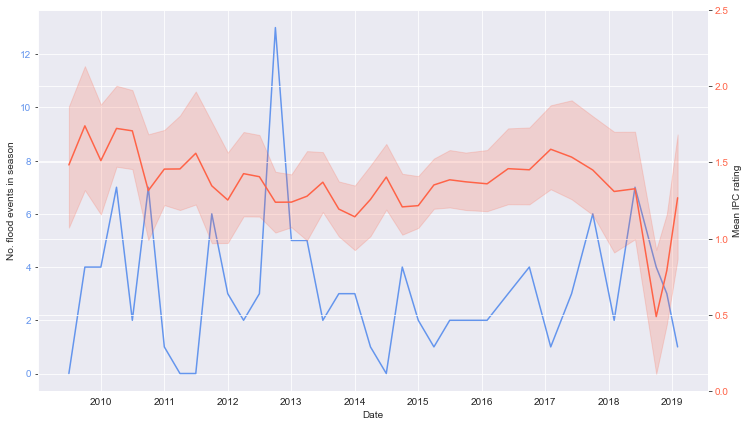

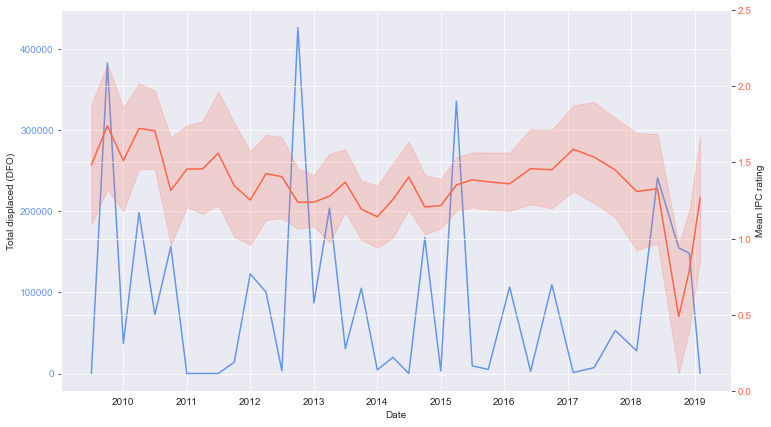

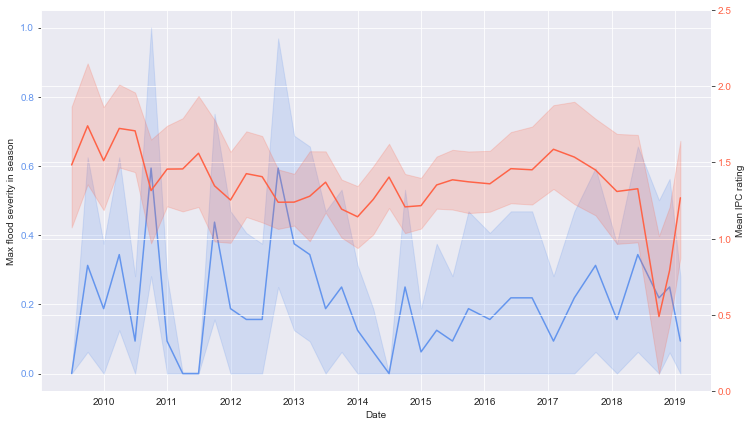

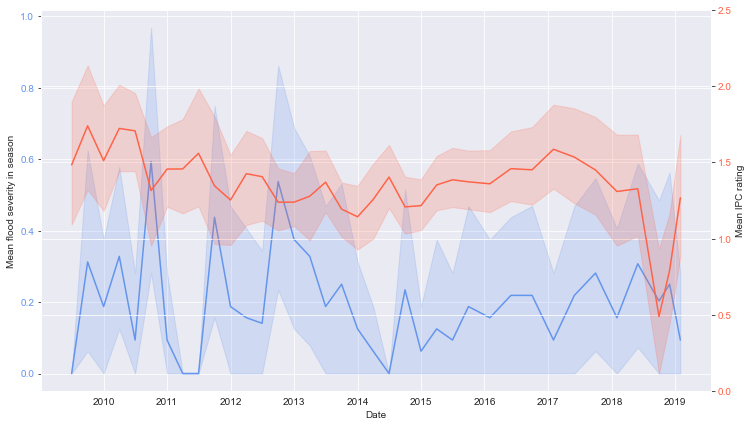

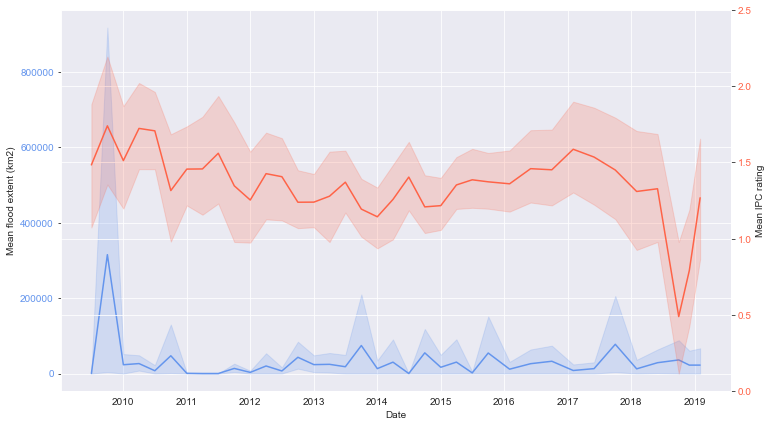

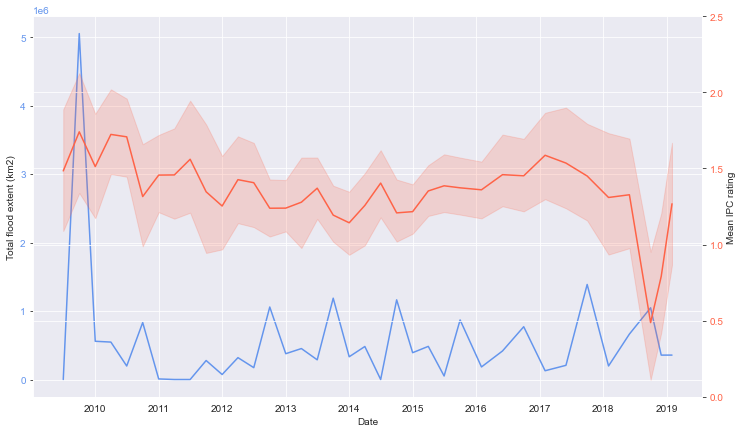

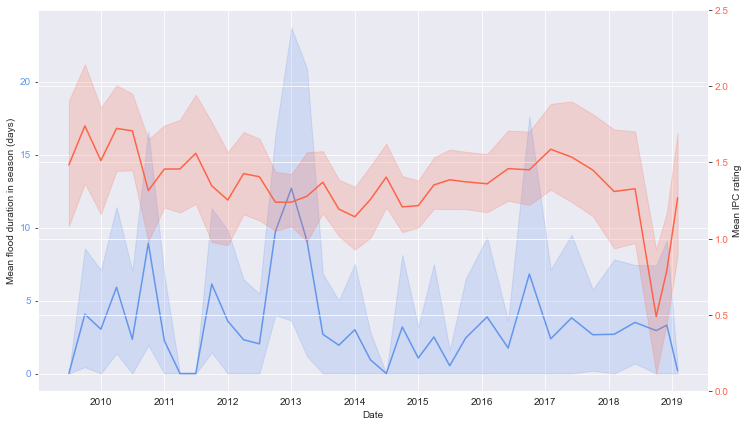

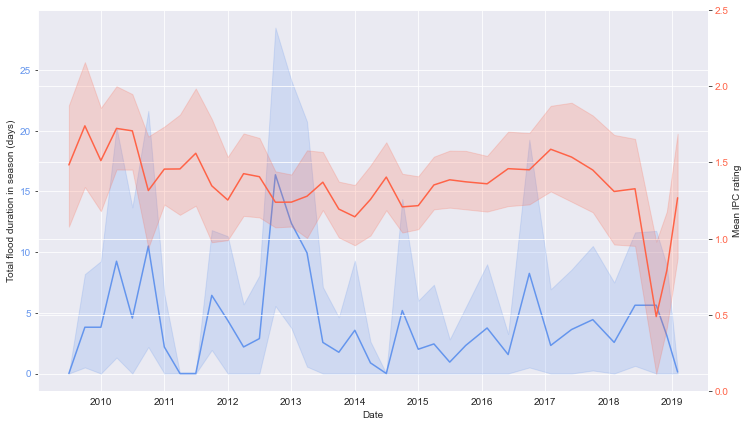

In [187]:
for i, cov in enumerate(covariate_names):

    fig, ax = plt.subplots(figsize = (12, 7))
    
    ax.tick_params(axis = 'y', labelcolor = 'cornflowerblue')

    sns.lineplot(x = "datetime", y = covariates[i], data = data,
            ax = ax, estimator = estimators[i], ci = cis[i],
                color = 'cornflowerblue').set(xlabel = 'Date', ylabel = cov)
    
    ax2 = ax.twinx()
    ax2.set_ylabel('Mean IPC rating')
    ax2.set_ylim(0, 2.5)
    ax2.tick_params(axis = 'y', labelcolor = 'tomato')
    
    sns.lineplot(x = "datetime", y = 'mean_ipc', data = data,
                ax = ax2, estimator = 'mean', ci = 95,
                color = 'tomato').set(ylabel = 'Mean IPC rating')

    plt.show()


In [193]:
estimators2 = ['sum', 'mean', 'mean', 'mean', 'mean', 'sum', 'mean', 'mean']
cis2 = [None, 95, 95, 95, 95, None, 95, 95]

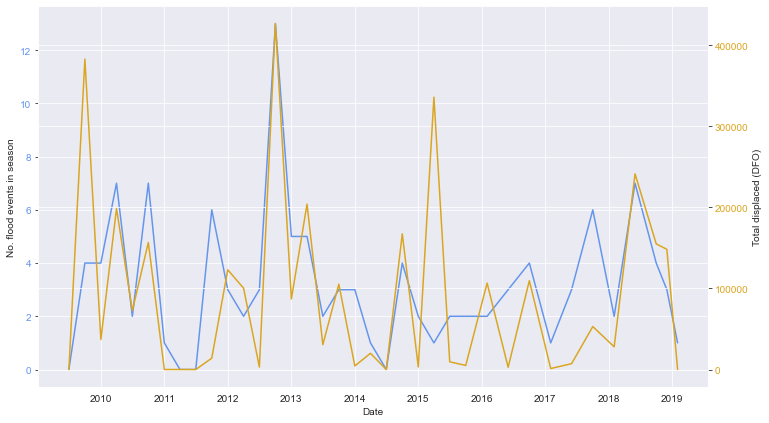

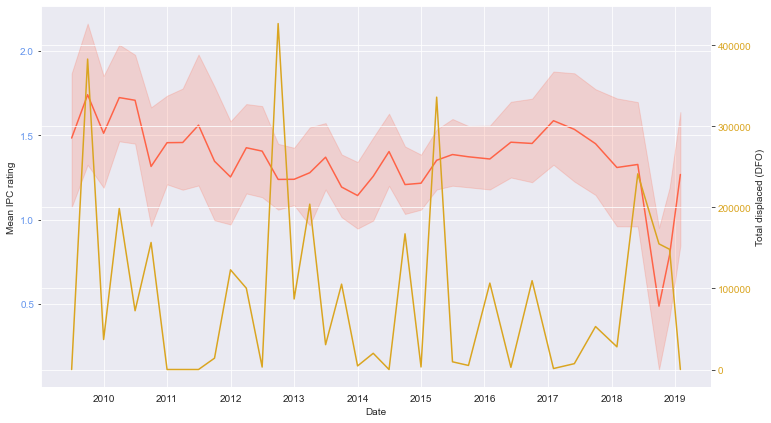

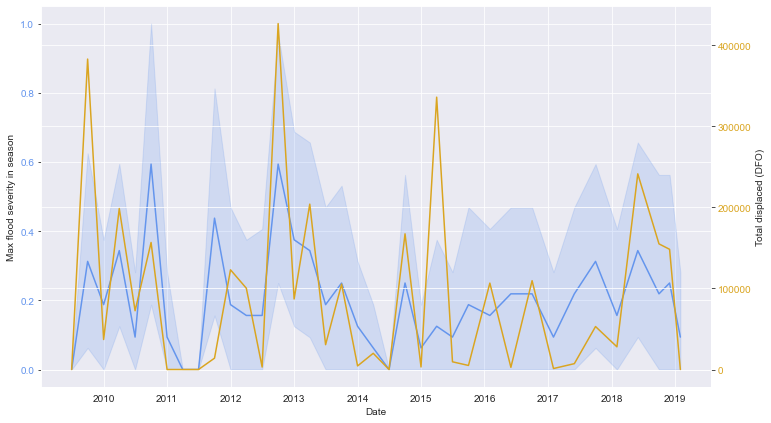

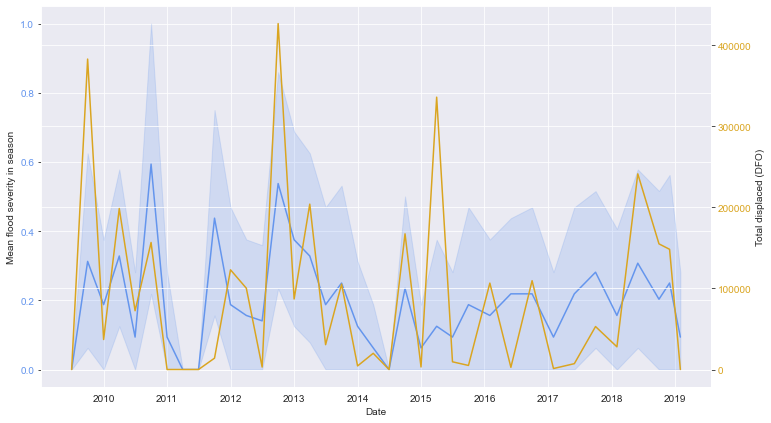

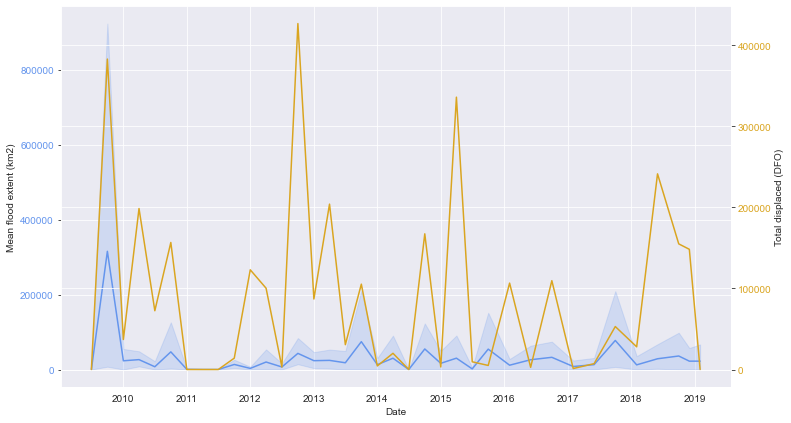

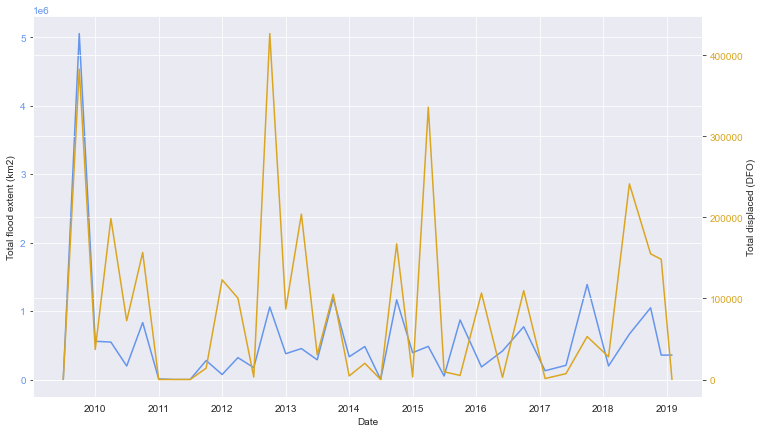

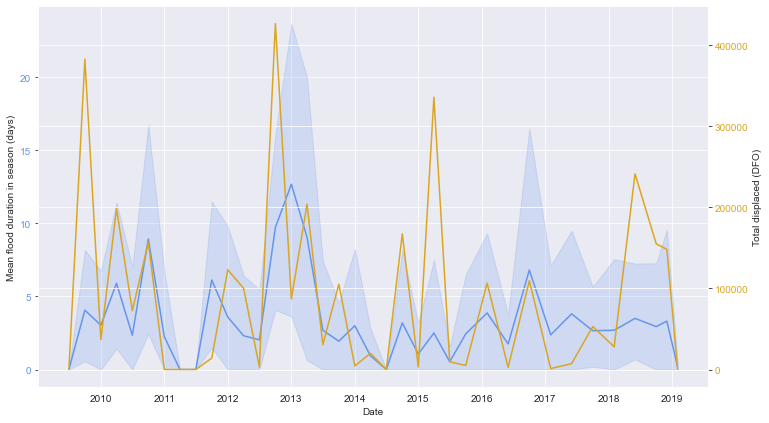

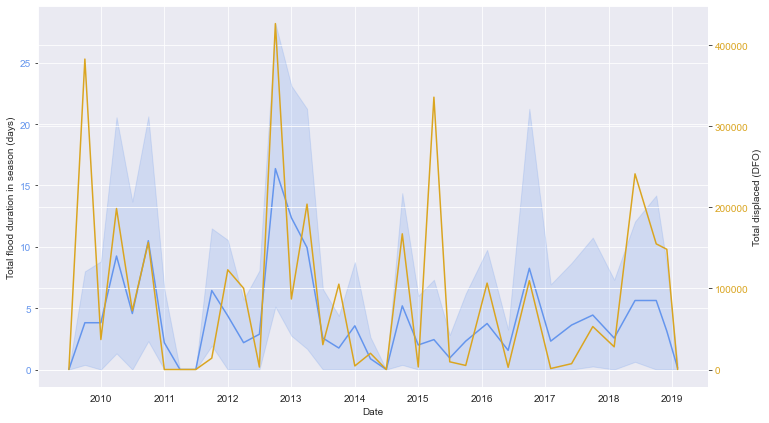

In [195]:
for i, cov in enumerate(covariate_names2):
    if i == 1:
        col = 'tomato'
    else:
        col = 'cornflowerblue'

    fig, ax = plt.subplots(figsize = (12, 7))
    
    ax.tick_params(axis = 'y', labelcolor = 'cornflowerblue')

    sns.lineplot(x = "datetime", y = covariates2[i], data = data,
            ax = ax, estimator = estimators2[i], ci = cis2[i],
                color = col).set(xlabel = 'Date', ylabel = cov)
    
    ax2 = ax.twinx()
    ax2.set_ylabel('Total displaced (DFO)')
    #ax2.set_ylim(0, 2.5)
    ax2.tick_params(axis = 'y', labelcolor = 'goldenrod')
    
    sns.lineplot(x = "datetime", y = 'total_displaced_dfo', data = data,
                ax = ax2, estimator = 'sum', ci = None,
                color = 'goldenrod').set(ylabel = 'Total displaced (DFO)')

    plt.show()

In [23]:
data.mean_ipc.max()

3.6116930776006693

In [21]:
data.loc[data.no_flood_events == 5].Month

309    10
Name: Month, dtype: int64